In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


- 다중회귀

In [4]:
features = df.columns[0:-1]
print(features)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


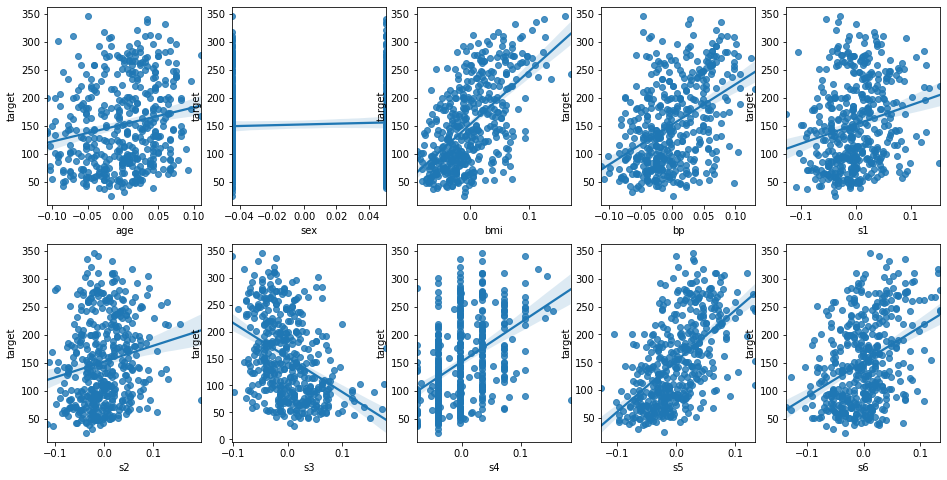

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
for i, feature in enumerate(features):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
y = diabetes.target
for feature in features:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}:\t{r2:4f}')

age:	0.035302
sex:	0.001854
bmi:	0.343924
bp:	0.194908
s1:	0.044954
s2:	0.030295
s3:	0.155859
s4:	0.185290
s5:	0.320224
s6:	0.146294


- train/test 분리

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[features], y , test_size=0.1, random_state=2021 
)

- LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [10]:
lr.score(X_test, y_test)

0.45584017860891024

In [11]:
lr.coef_, lr.intercept_

(array([ -14.06014661, -246.92791992,  547.80956855,  286.58708365,
        -656.22582592,  364.21134557,   60.28474402,  182.53318837,
         702.08292875,   68.21197298]),
 151.67372554450927)

- DecisionTree Regressor

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=2021)
dtr.fit(X_train, y_train)
pred_dt = dtr.predict(X_test)

- 결과비교: Model 성능 MSE

In [17]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr)        #Line
mse_dt = mean_squared_error(y_test, pred_dt)        #Decision
print(f'MSE - LR: {mse_lr:.4f}, DTR: {mse_dt:.4f}')

MSE - LR: 2370.1979, DTR: 7060.0222


In [18]:
res = pd.DataFrame({
    'y_test':y_test, 'lr':pred_lr, 'dt':pred_dt
})
res.head(10)

,y_test,lr,dt
0,155.0,156.031216,70.0
1,167.0,185.700495,53.0
2,185.0,162.863840,198.0
3,109.0,162.545441,123.0
4,65.0,78.518494,114.0
5,77.0,60.600694,87.0
6,277.0,175.198247,332.0
7,244.0,176.770871,77.0
8,148.0,131.425197,88.0
9,102.0,88.053772,69.0
